## Load the test image

Load the test image and crop the image a bit as to speed up testing.  We also reverse the z axis of the stack so that it is consistent with positive 'depth' being below the coverslip.  We have cropped the test image to better demonstrate the performance of different edge handling approaches the cropped version of the image can be found [here](https://www.dropbox.com/scl/fo/mlxw2lp4vaaveuikkqqe8/h?dl=0&rlkey=wznzj1kb6g3yx5wo6lqyz5je8) and the original image can be found [here](http://bigwww.epfl.ch/deconvolution/bead/)

uint16 0 65535
float32 0.0 65535.0
(256, 256, 256)
(256, 256, 256)


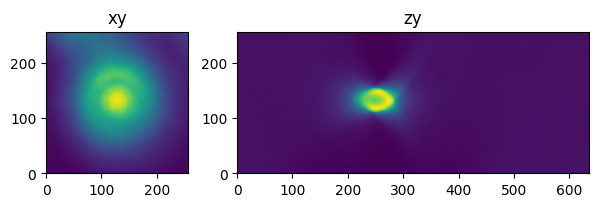

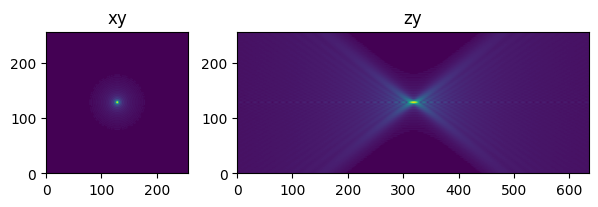

In [54]:
from skimage.io import imread
import numpy as np
from tnia.plotting.projections import show_xy_zy_slice

path_=r"D:\images\tnia-python-images\deconvolution\bead"

bead=imread(path_+"/bead.tif")
psf=imread(path_+"/PSF-Bead.tif")
print(psf.dtype, psf.min(), psf.max())
psf=psf.astype(np.float32)
print(psf.dtype, psf.min(), psf.max())
psf=psf/psf.sum()
z_to_view=bead.shape[0]//2

xy_spacing = 0.0645
z_spacing=.16

ratio = z_spacing/xy_spacing

print(bead.shape)
print(psf.shape)

fig=show_xy_zy_slice(bead,128,128,z_to_view, sz=ratio, figsize=(7,4))
fig=show_xy_zy_slice(psf,128,128,z_to_view, sz=ratio, figsize=(7,4), gamma=0.3)


In [57]:
from tnia.nd.ndutil import centercrop
from tnia.deconvolution.psfs import gibson_lanni_3D
from tnia.plotting.projections import show_xy_zy_max
from tnia.deconvolution.psfs import recenter_psf_axial
from skimage.io import imsave

ni=1.518
ns= 1.49
NA=1.4
w=0.530

xy_spacing = 0.0645
z_spacing=.16

xy_psf_dim=256
z_compute_psf_dim=256

#depth to compute PSF at
d=0#128*z_spacing

psf2  = gibson_lanni_3D(NA, ni, ns, xy_spacing, z_spacing, xy_psf_dim, z_compute_psf_dim, d, w)
psf2 = psf2/psf2.sum()
psf2 = psf2.astype('float32')

sdeconv 1.x.x detected


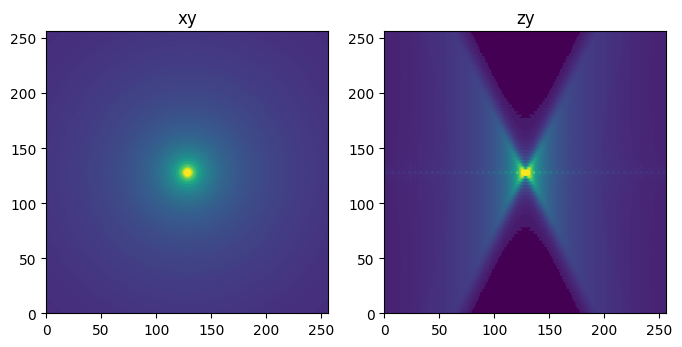

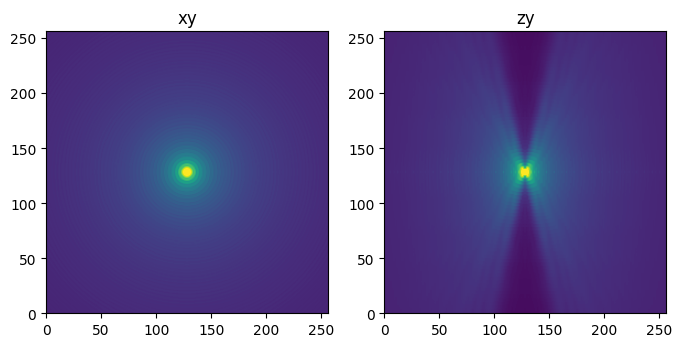

In [58]:

fig=show_xy_zy_max(psf, gamma=0.3, vmax=psf.max()/10, figsize=(8,4))
fig=show_xy_zy_max(psf2, gamma=0.3, vmax=psf.max()/10,figsize=(8,4))

In [61]:
from tnia.plotting.interactive_projections import show_xyz_slice_interactive

show_xyz_slice_interactive(psf2, sxy=1, sz=1,figsize=(10,10), colormap=None, vmax=psf.max()/5, gamma=0.3)

interactive(children=(IntSlider(value=128, description='x', max=255), IntSlider(value=128, description='y', ma…

## Set deconvolution parameters

In [59]:
from clij2fft.richardson_lucy import richardson_lucy_nc

bead = bead.astype('float32')
psf = psf.astype('float32')
regularization_factor=0
iterations=200


## Perform deconvolution 

get lib
get lib


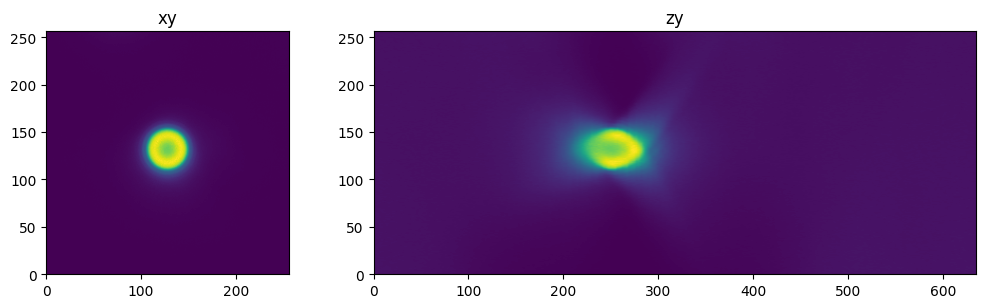

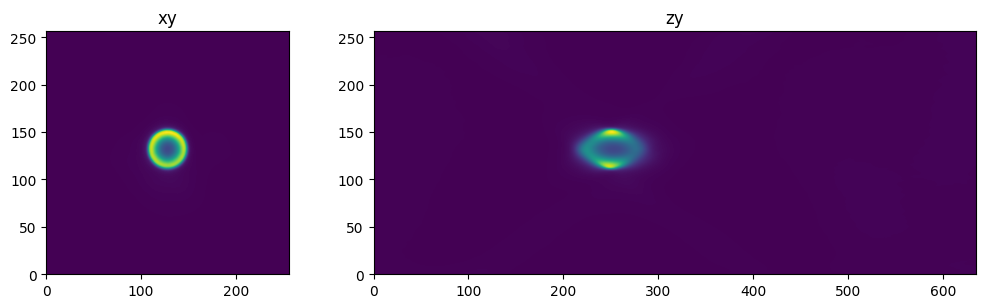

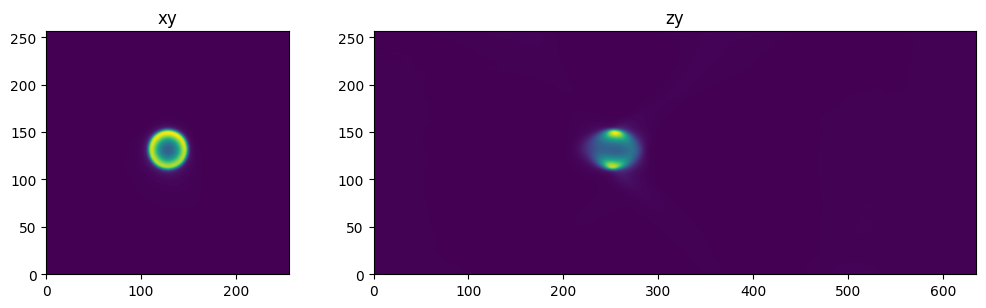

In [62]:
regularization_factor=0
iterations=200

z_to_view = 102

im_decon_clij= richardson_lucy_nc(bead, psf, iterations , regularization_factor)
im_decon_clij2= richardson_lucy_nc(bead, psf2, iterations , regularization_factor)

#fig=show_xy_zy_slice(im_decon_clij,128,128,z_to_view, sz=ratio, figsize=(7,4))
fig=show_xy_zy_slice(bead,128,128,z_to_view, sz=ratio, figsize=(12,8))
fig=show_xy_zy_slice(im_decon_clij,128,128,z_to_view, sz=ratio, figsize=(12,8))
fig=show_xy_zy_slice(im_decon_clij2,128,128,z_to_view, sz=ratio, figsize=(12,8))


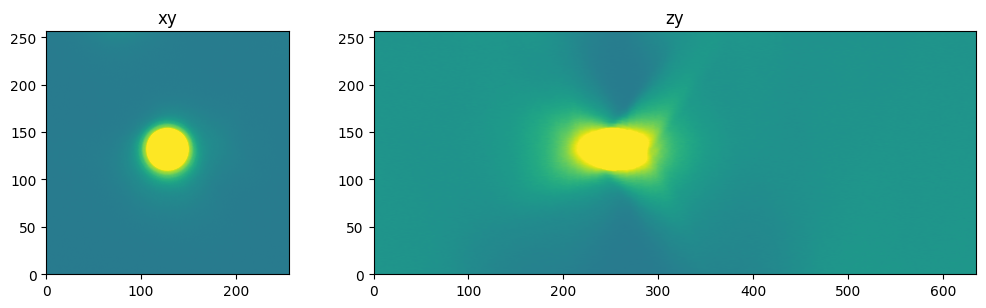

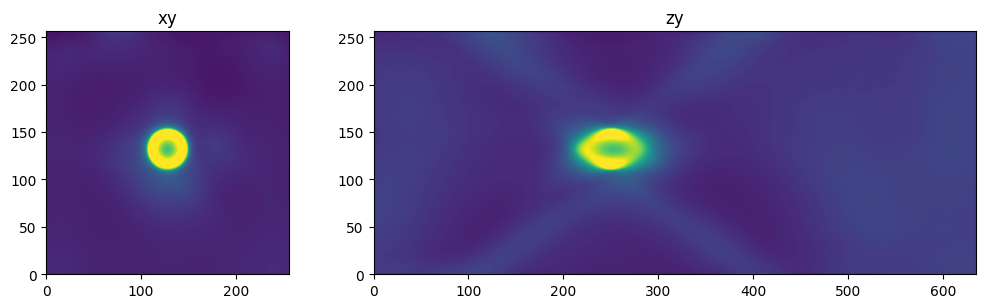

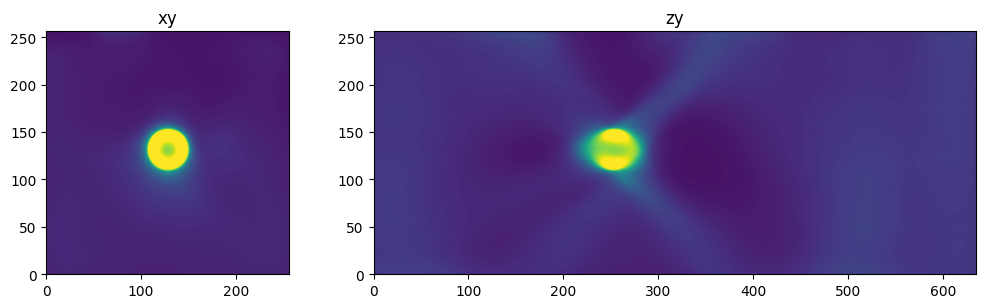

In [65]:
fig=show_xy_zy_slice(bead,128,128,z_to_view, sz=ratio, figsize=(12,8), gamma=0.4, vmax=bead.max()/2)
fig=show_xy_zy_slice(im_decon_clij,128,128,z_to_view, sz=ratio, figsize=(12,8), gamma=0.4, vmax=im_decon_clij.max()/2)
fig=show_xy_zy_slice(im_decon_clij2,128,128,z_to_view, sz=ratio, figsize=(12,8), gamma=0.4, vmax=im_decon_clij2.max()/2)